In [1]:
import pandas as pd
import numpy as np

In [2]:
context_config = {
    'Real': {
        'set': set(),
        'def_eps': 0.1,
    },
    'Sintetic': {
        'set': set(),
        'def_eps': 0.01,
    },
}

df = pd.read_csv('out_refactored.csv')
for i, cont in enumerate(df['Context']):
    cont_splited = cont.split('/')
    new_name = cont_splited[-1].split('.')[0]
    if len(cont_splited) > 2:
        context_config['Sintetic']['set'].add(new_name)
    else:
        context_config['Real']['set'].add(new_name)
    df.at[i, 'Context'] = (new_name)

df.head()

,Context,Epsilon,Delta,Aproximation_type,Distribution_type,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,mushroom,0.1,0.1,weak,uniform,8,0.111396,0.016469,0.044174,0.000000,...,10,59,1196,98,1,24.985229,89.709503,7.090103,0.000000,0.000000
1,mushroom,0.1,0.1,weak,frequent,8,0.802246,0.062004,0.688678,0.000000,...,69,208,3977,852,1,26.157601,56.720827,23.042836,2.264894,0.590842
2,mushroom,0.1,0.1,weak,area-based,8,0.912432,0.067337,0.794175,0.000000,...,76,224,4582,974,1,24.630076,54.948301,20.088626,1.329394,0.295421
3,mushroom,0.1,0.1,strong,uniform,8,0.680548,0.016272,0.614398,0.002727,...,95,116,458,1411,1,11.694006,29.197440,5.317578,0.295421,0.098474
4,mushroom,0.1,0.1,strong,frequent,8,49.446444,0.840661,48.545906,0.418339,...,614,1944,35494,41091,1,11.825640,25.997046,7.680945,1.181684,0.590842


In [3]:
default_epxerement = df[
    ((df['Epsilon'] == context_config['Real']['def_eps']) &
        (df['Context'].isin(context_config['Real']['set']))) |
    ((df['Epsilon'] == context_config['Sintetic']['def_eps']) &
        (df['Context'].isin(context_config['Sintetic']['set'])))
]
default_groupby = default_epxerement.groupby(
    ['Aproximation_type', 'Distribution_type', 'Context']
).mean()

In [4]:
# default_groupby[['Total_execution_time']].to_csv('Table_2_time_execution.csv')

In [5]:
# default_groupby[['Basis_size']].to_csv('Table_3_basis_size.csv')

In [6]:
# default_groupby[[
#     'Support_avg', 'Support_p10', 'Support_p50', 'Support_p90', 'Support_p95'
# ]].to_csv('Table_5_support.csv')

In [7]:
a = df.groupby(['Epsilon', 'Context', 'Distribution_type', 'Aproximation_type']).count()

In [8]:
default_gby = default_epxerement.groupby(
    ['Aproximation_type', 'Distribution_type', 'Context'], as_index=False
).mean()

In [9]:
default_gby.head()

,Aproximation_type,Distribution_type,Context,Epsilon,Delta,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,strong,area-based,10,0.01,0.1,8.0,0.376589,0.200175,0.170924,0.022646,...,323.666667,627.555556,112161.000,46.444444,4.666667,32.506268,33.333333,33.333333,30.000000,14.814815
1,strong,area-based,100,0.01,0.1,8.0,0.011645,0.000030,0.000021,0.000221,...,1.000000,2.000000,299.000,0.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,strong,area-based,1000,0.01,0.1,8.0,0.481409,0.000646,0.000592,0.000091,...,1.000000,2.000000,299.000,0.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000
3,strong,area-based,15,0.01,0.1,8.0,0.536955,0.286924,0.244361,0.018683,...,294.750000,548.500000,138343.625,92.250000,0.000000,28.147980,31.666666,29.166667,23.611111,19.444444
4,strong,area-based,5,0.01,0.1,8.0,0.042607,0.000000,0.000000,0.000000,...,0.000000,0.000000,299.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
def get_from_ds(df, distribution, approximation, column):
    res = df[(df['Aproximation_type'] == approximation) & (df['Distribution_type'] == distribution)][column]
    if len(res):
        return res.iloc[0]
    else:
        return -1.0

def get_from_ds_columns(df, distribution, approximation, columns):
    res = ''
    for column in columns:
        res += '%.4f' % get_from_ds(df, distribution, approximation, column) + ' & '
    return res

context_map = {
    'Census': '',
    'nom10shuttle': '',
    'Mushroom': '',
    'Connect': '',
    'inter10shuttle': '',
    'Chess': '',
    'Example 1 (n = 5)': '',
    'Example 1 (n = 6)': '',
    'Example 2 (n = 10)': '',
    'Example 2 (n = 15)': '',
}

for context in context_map:
    if context[0] == 'E':
        context_map[context] = context.split()[-1][:-1]
    else:
        context_map[context] = context.lower()

distributions = [
    'uniform',
    'frequent',
    'area-based',
    'squared-frequency',
]

approximations = ['strong', 'weak']

def get_table_for(column):
    res = str()
    for context, context_from_config in context_map.items():
        eps_value = context_config['Real']['def_eps']\
            if context_from_config in context_config['Real']['set']\
                else context_config['Sintetic']['def_eps']

        context_rows = default_gby[
            (default_gby['Context'] == context_from_config) &
            (abs(default_gby['Epsilon'] - eps_value) < 0.0003)
        ]
        res += '        ' + context + ' & '
        for approximation in approximations:
            for distribution in distributions:
                res += '%.2f' % get_from_ds(context_rows, distribution, approximation, column) + ' & '
        res = res[:-2] + '\\\\\n'
    return res

print(get_table_for('Basis_size'))

        Census & 48.00 & -1.00 & -1.00 & -1.00 & 41.00 & 846.67 & 3106.50 & -1.00 \\
        nom10shuttle & 76.00 & 196.33 & 195.67 & 107.67 & 76.00 & 143.50 & 149.67 & 98.14 \\
        Mushroom & 95.00 & 606.00 & 547.71 & 571.00 & 7.62 & 72.38 & 71.12 & 77.25 \\
        Connect & 120.00 & 10604.50 & 10395.00 & 6132.86 & 7.00 & 9.89 & 9.00 & 9.71 \\
        inter10shuttle & 172.00 & 437.33 & 437.83 & 317.50 & 171.00 & 171.00 & 171.00 & 171.00 \\
        Chess & 64.00 & 6269.00 & 6185.50 & 8425.25 & 48.00 & 48.33 & 48.17 & 49.83 \\
        Example 1 (n = 5) & 5.00 & 0.00 & 0.00 & 0.00 & 5.00 & 0.00 & 0.00 & 0.00 \\
        Example 1 (n = 6) & 6.00 & 0.00 & 0.00 & 0.00 & 6.00 & 0.00 & 0.00 & 0.00 \\
        Example 2 (n = 10) & 359.22 & 295.78 & 323.67 & 156.00 & 321.89 & 225.56 & 292.67 & 181.50 \\
        Example 2 (n = 15) & 439.56 & 9.75 & 294.75 & 2.00 & 382.22 & 9.25 & 77.12 & 0.00 \\



In [212]:
print(get_table_for('Total_counter_examples'))

        Census & 102.50 & -1.00 & -1.00 & -1.00 & 41.00 & 1104.00 & 4545.17 & -1.00 \\
        nom10shuttle & 76.00 & 349.83 & 361.00 & 143.17 & 76.00 & 218.33 & 238.00 & 120.43 \\
        Mushroom & 112.25 & 1918.00 & 1780.29 & 1497.43 & 44.50 & 219.25 & 218.75 & 199.75 \\
        Connect & 121.00 & 46462.00 & 46462.00 & 21458.71 & 39.44 & 39.11 & 37.89 & 40.14 \\
        inter10shuttle & 191.17 & 2650.33 & 2669.83 & 1609.50 & 171.00 & 171.00 & 171.00 & 171.00 \\
        Chess & 321.50 & 46388.00 & 46388.00 & 46388.00 & 48.00 & 48.33 & 48.17 & 50.83 \\
        Example 1 (n = 5) & 22.81 & 0.00 & 0.00 & 0.00 & 23.41 & 0.00 & 0.00 & 0.00 \\
        Example 1 (n = 6) & 32.07 & 0.00 & 0.00 & 0.00 & 31.62 & 0.00 & 0.00 & 0.00 \\
        Example 2 (n = 10) & 698.67 & 560.56 & 627.56 & 271.00 & 631.22 & 425.78 & 569.78 & 321.50 \\
        Example 2 (n = 15) & 894.11 & 12.38 & 548.50 & 2.00 & 784.44 & 10.50 & 129.00 & 0.00 \\



In [11]:
print(get_table_for('Total_execution_time'))

        Census & 0.35 & -1.00 & -1.00 & -1.00 & 0.23 & 78.59 & 1013.06 & -1.00 \\
        nom10shuttle & 0.20 & 6.03 & 6.23 & 203.35 & 0.23 & 2.21 & 2.60 & 202.62 \\
        Mushroom & 0.67 & 48.46 & 41.51 & 48.65 & 0.09 & 0.92 & 0.88 & 10.91 \\
        Connect & 0.87 & 9629.22 & 9383.89 & 3102.40 & 0.13 & 0.12 & 0.12 & 21.12 \\
        inter10shuttle & 1.19 & 119.45 & 120.87 & 289.70 & 1.20 & 1.22 & 1.22 & 241.67 \\
        Chess & 0.12 & 2747.14 & 2661.10 & 4326.53 & 0.07 & 0.04 & 0.04 & 12.78 \\
        Example 1 (n = 5) & 0.05 & 0.04 & 0.04 & 4.49 & 0.05 & 0.04 & 0.04 & 4.59 \\
        Example 1 (n = 6) & 0.86 & 0.65 & 0.67 & 1077.19 & 0.88 & 0.65 & 0.65 & 1039.06 \\
        Example 2 (n = 10) & 0.38 & 0.27 & 0.38 & 0.12 & 0.30 & 0.19 & 0.32 & 0.15 \\
        Example 2 (n = 15) & 0.90 & 0.01 & 0.54 & 0.01 & 0.83 & 0.01 & 0.09 & 0.09 \\



In [190]:
print(get_table_for('Total_counter_examples'))

        Census & 102 & -1 & -1 & -1 & 41 & 1104 & 4545 & -1 \\
        nom10shuttle & 76 & 350 & 361 & 143 & 76 & 218 & 238 & 120 \\
        Mushroom & 112 & 1918 & 1780 & 1497 & 44 & 219 & 219 & 200 \\
        Connect & 121 & 46462 & 46462 & 21459 & 39 & 39 & 38 & 40 \\
        inter10shuttle & 191 & 2650 & 2670 & 1610 & 171 & 171 & 171 & 171 \\
        Chess & 322 & 46388 & 46388 & 46388 & 48 & 48 & 48 & 51 \\
        Example 1 (n = 5) & 23 & 0 & 0 & 0 & 23 & 0 & 0 & 0 \\
        Example 1 (n = 6) & 32 & 0 & 0 & 0 & 32 & 0 & 0 & 0 \\
        Example 2 (n = 10) & 699 & 561 & 628 & 271 & 631 & 426 & 570 & 322 \\
        Example 2 (n = 15) & 894 & 12 & 548 & 2 & 784 & 10 & 129 & 0 \\



In [191]:
def get_table_for_operation(col1, col2, operation):
    res = str()
    for context, context_from_config in context_map.items():
        eps_value = context_config['Real']['def_eps']\
            if context_from_config in context_config['Real']['set']\
                else context_config['Sintetic']['def_eps']

        context_rows = default_gby[
            (default_gby['Context'] == context_from_config) &
            (abs(default_gby['Epsilon'] - eps_value) < 0.0003)
        ]
        res += '        ' + context + ' & '
        for approximation in approximations:
            for distribution in distributions:
                operation_result = operation(
                    get_from_ds(context_rows, distribution, approximation, col1),
                    get_from_ds(context_rows, distribution, approximation, col2)
                )
                res += '%.2f' % operation_result + ' & ' if operation_result > 0 else 'N/A & '

        res = res[:-2] + '\\\\\n'
    return res

def diff(a, b):
    if b == 0:
        return -1.
    return a / b

print(get_table_for_operation('Total_counter_examples', 'Total_execution_time', diff))

        Census & 295.85 & 1.00 & 1.00 & 1.00 & 181.98 & 14.05 & 4.49 & 1.00 \\
        nom10shuttle & 380.17 & 58.03 & 57.92 & 0.70 & 333.66 & 98.86 & 91.44 & 0.59 \\
        Mushroom & 168.25 & 39.58 & 42.89 & 30.78 & 475.04 & 237.15 & 249.38 & 18.31 \\
        Connect & 138.57 & 4.83 & 4.95 & 6.92 & 300.91 & 315.29 & 307.42 & 1.90 \\
        inter10shuttle & 160.86 & 22.19 & 22.09 & 5.56 & 142.11 & 140.67 & 139.89 & 0.71 \\
        Chess & 2705.53 & 16.89 & 17.43 & 10.72 & 688.02 & 1166.59 & 1149.54 & 3.98 \\
        Example 1 (n = 5) & 486.35 & N/A & N/A & N/A & 468.20 & N/A & N/A & N/A \\
        Example 1 (n = 6) & 37.25 & N/A & N/A & N/A & 36.13 & N/A & N/A & N/A \\
        Example 2 (n = 10) & 1837.84 & 2089.42 & 1666.42 & 2312.41 & 2131.17 & 2243.47 & 1764.49 & 2092.96 \\
        Example 2 (n = 15) & 997.70 & 1480.60 & 1021.50 & 292.74 & 943.31 & 1724.56 & 1474.13 & N/A \\



In [192]:
df.columns

Index(['Context', 'Epsilon', 'Delta', 'Aproximation_type', 'Distribution_type',
       'Threads', 'Total_execution_time', 'Total_time', 'Total_exec_time_2',
       'Total_closure_time', 'Updown_time', 'Total_closure_computations',
       'Total_up_down_computes', 'Basis_size', 'Total_counter_examples',
       'Sum_total_tries', 'Equal_to_count', 'Empty_set_closure_computes',
       'Support_avg', 'Support_p10', 'Support_p50', 'Support_p90',
       'Support_p95'],
      dtype='object')

In [193]:
print(get_table_for('Total_execution_time'))

        Census & 0 & -1 & -1 & -1 & 0 & 79 & 1013 & -1 \\
        nom10shuttle & 0 & 6 & 6 & 203 & 0 & 2 & 3 & 203 \\
        Mushroom & 1 & 48 & 42 & 49 & 0 & 1 & 1 & 11 \\
        Connect & 1 & 9629 & 9384 & 3102 & 0 & 0 & 0 & 21 \\
        inter10shuttle & 1 & 119 & 121 & 290 & 1 & 1 & 1 & 242 \\
        Chess & 0 & 2747 & 2661 & 4327 & 0 & 0 & 0 & 13 \\
        Example 1 (n = 5) & 0 & 0 & 0 & 4 & 0 & 0 & 0 & 5 \\
        Example 1 (n = 6) & 1 & 1 & 1 & 1077 & 1 & 1 & 1 & 1039 \\
        Example 2 (n = 10) & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
        Example 2 (n = 15) & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\



In [194]:
df.head()

,Context,Epsilon,Delta,Aproximation_type,Distribution_type,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,mushroom,0.1,0.1,weak,uniform,8,0.111396,0.016469,0.044174,0.000000,...,10,59,1196,98,1,24.985229,89.709503,7.090103,0.000000,0.000000
1,mushroom,0.1,0.1,weak,frequent,8,0.802246,0.062004,0.688678,0.000000,...,69,208,3977,852,1,26.157601,56.720827,23.042836,2.264894,0.590842
2,mushroom,0.1,0.1,weak,area-based,8,0.912432,0.067337,0.794175,0.000000,...,76,224,4582,974,1,24.630076,54.948301,20.088626,1.329394,0.295421
3,mushroom,0.1,0.1,strong,uniform,8,0.680548,0.016272,0.614398,0.002727,...,95,116,458,1411,1,11.694006,29.197440,5.317578,0.295421,0.098474
4,mushroom,0.1,0.1,strong,frequent,8,49.446444,0.840661,48.545906,0.418339,...,614,1944,35494,41091,1,11.825640,25.997046,7.680945,1.181684,0.590842


In [228]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

translate = {
    'uniform': 'Равномерное',
    'frequent': 'Частотное',
    'area-based': 'Площадь',
    'squared-frequency': 'Квадратное',
    'weak': '',
    'strong': 'Сильная ',
}

def draw_for_context(context, ax=None):
    if ax is not None:
        plt.sca(ax)

    context_from_config = context_map[context]
    xs = ['Support_p10', 'Support_p50', 'Support_p90', 'Support_p95']
    xlabels = list(int(t.split('p')[-1]) for t in xs)
    eps_value = context_config['Real']['def_eps']\
        if context_from_config in context_config['Real']['set']\
            else context_config['Sintetic']['def_eps']
    context_rows = default_gby[
        (default_gby['Context'] == context_from_config) &
        (abs(default_gby['Epsilon'] - eps_value) < 0.0003)
    ]

    for approximation in approximations:
        for distribution in distributions:
            # if approximation == 'weak' or distribution == 'uniform':
            #     continue

            ys = []
            for x in xs:
                ys += [get_from_ds(context_rows, distribution, approximation, x)]
            plt.plot(xlabels, ys, label=f'{translate[approximation]}{translate[distribution]}')
    plt.title(f'Поддержка для {context}')
    plt.ylabel('Пожжержка в процентах')
    plt.xlabel('Процент импликаций')
    plt.legend()

col_size = 6
row_size = 2
# fig, axs = plt.subplots(col_size, row_size, figsize=(20, 40))
i = 0
for context in context_map:
    # if 'Connect' not in context or 'Chess' not in context:
    #     continue
    if i == 4:
        i += 1

    # draw_for_context(context, axs[i % col_size][i // col_size])
    i += 1

# handles, labels = axs[0][0].get_legend_handles_labels()
# fig.legend(handles, labels, bbox_to_anchor=(0.6, 0.65, 0.2, 0.2), fontsize='x-large')
# fig.delaxes(axs[0])
# draw_for_context('Connect', axs)
# draw_for_context('Chess', axs)
plt.show()

In [230]:
context_map.keys()

dict_keys(['Census', 'nom10shuttle', 'Mushroom', 'Connect', 'inter10shuttle', 'Chess', 'Example 1 (n = 5)', 'Example 1 (n = 6)', 'Example 2 (n = 10)', 'Example 2 (n = 15)'])

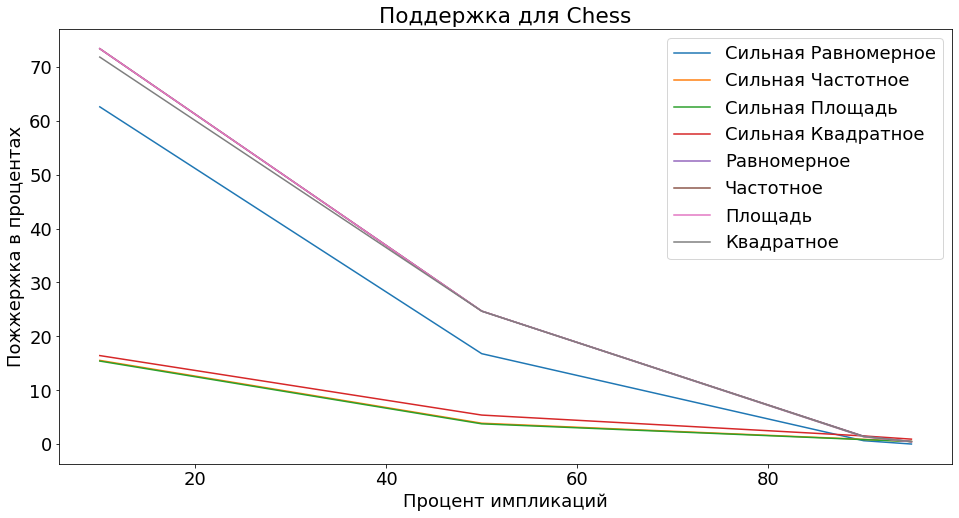

In [239]:
fig, axs = plt.subplots(1, 1, figsize=(16, 8))
draw_for_context('Chess', axs)

In [197]:
print(distributions)

['uniform', 'frequent', 'area-based', 'squared-frequency']


In [198]:
group_for_3 = df.groupby(
    ['Aproximation_type', 'Distribution_type', 'Context', 'Epsilon'], as_index=False
).mean()

In [199]:
def get_eps_for_context(context, col_name, cnt):
    context_from_config = context_map[context]
    xs = [0.3, 0.2, 0.1, 0.05, 0.01]

    res = ''
    for approximation in approximations:
        for distribution in distributions:
            res += f'        {translate[approximation]}{translate[distribution]} & '
            for eps_value in xs:
                context_rows = group_for_3[
                    (group_for_3['Context'] == context_from_config) &
                    (abs(group_for_3['Epsilon'] - eps_value) < 0.0003)
                ]
                pr = f'%.{cnt}f'
                res += f'{pr % get_from_ds(context_rows, distribution, approximation, col_name)} & '
                # res += '%.2f' % operation_result + ' & ' if operation_result > 0 else 'N/A & '

            res = res[:-2] + '\\\\\n'
    return res

In [200]:
print(get_eps_for_context('Chess', 'Basis_size', 0))

        Сильная Равномерное & 55 & 57 & 64 & 68 & 86 \\
        Сильная Частотное & 6312 & 6287 & 6269 & 6264 & 6317 \\
        Сильная Площадь & 6173 & 6182 & 6186 & 6195 & 6230 \\
        Сильная Квадратное & 6324 & 8443 & 8425 & 8392 & 8434 \\
        Равномерное & 48 & 48 & 48 & 48 & 48 \\
        Частотное & 48 & 48 & 48 & 48 & 51 \\
        Площадь & 48 & 48 & 48 & 49 & 63 \\
        Квадратное & 48 & 49 & 50 & 49 & 177 \\



In [201]:
print(get_eps_for_context('Chess', 'Total_execution_time', 2))


        Сильная Равномерное & 0.06 & 0.08 & 0.12 & 0.17 & 0.86 \\
        Сильная Частотное & 2757.78 & 2738.72 & 2747.14 & 2728.91 & 3845.80 \\
        Сильная Площадь & 2650.18 & 2658.31 & 2661.10 & 2663.18 & 3765.67 \\
        Сильная Квадратное & 2488.71 & 4330.36 & 4326.53 & 4274.22 & 4308.55 \\
        Равномерное & 0.10 & 0.04 & 0.07 & 0.04 & 0.06 \\
        Частотное & 0.04 & 0.04 & 0.04 & 0.04 & 0.09 \\
        Площадь & 0.04 & 0.04 & 0.04 & 0.04 & 0.18 \\
        Квадратное & 12.73 & 12.71 & 12.78 & 12.38 & 14.10 \\



In [202]:
print(get_eps_for_context('Example 2 (n = 15)', 'Total_execution_time', 4))

        Сильная Равномерное & 0.0018 & 0.0010 & 0.0010 & 0.0013 & 0.8962 \\
        Сильная Частотное & 0.0010 & 0.0011 & 0.0012 & 0.0013 & 0.0084 \\
        Сильная Площадь & 0.0017 & 0.0010 & 0.0014 & 0.0017 & 0.5370 \\
        Сильная Квадратное & 0.0043 & 0.0039 & 0.0041 & 0.0043 & 0.0068 \\
        Равномерное & 0.0010 & 0.0010 & 0.0010 & 0.0012 & 0.8316 \\
        Частотное & 0.0010 & 0.0011 & 0.0010 & 0.0012 & 0.0061 \\
        Площадь & 0.0013 & 0.0011 & 0.0012 & 0.0015 & 0.0875 \\
        Квадратное & 0.0039 & 0.0040 & 0.0045 & 0.0040 & 0.0884 \\



In [203]:
print(get_eps_for_context('Example 2 (n = 15)', 'Basis_size', 0))

        Сильная Равномерное & 0 & 0 & 1 & 0 & 440 \\
        Сильная Частотное & 0 & 0 & 1 & 0 & 10 \\
        Сильная Площадь & 0 & 0 & 0 & 0 & 295 \\
        Сильная Квадратное & 0 & 0 & 0 & 0 & 2 \\
        Равномерное & 0 & 0 & 1 & 0 & 382 \\
        Частотное & 0 & 0 & 1 & 0 & 9 \\
        Площадь & 0 & 0 & 1 & 1 & 77 \\
        Квадратное & 0 & 0 & 0 & 0 & 0 \\



In [204]:
print(get_eps_for_context('inter10shuttle', 'Basis_size', 0))

        Сильная Равномерное & 172 & 172 & 172 & 172 & 172 \\
        Сильная Частотное & 356 & 396 & 437 & 474 & 589 \\
        Сильная Площадь & 355 & 385 & 438 & 483 & 564 \\
        Сильная Квадратное & 267 & 272 & 318 & 346 & 395 \\
        Равномерное & 171 & 171 & 171 & 171 & 171 \\
        Частотное & 171 & 171 & 171 & 171 & 171 \\
        Площадь & 171 & 171 & 171 & 171 & 171 \\
        Квадратное & 171 & 171 & 171 & 171 & 171 \\



In [205]:
print(get_eps_for_context('inter10shuttle', 'Total_execution_time', 2))

        Сильная Равномерное & 1.18 & 1.19 & 1.19 & 1.21 & 1.53 \\
        Сильная Частотное & 62.66 & 90.02 & 119.45 & 155.20 & 413.23 \\
        Сильная Площадь & 60.23 & 82.31 & 120.87 & 163.42 & 358.50 \\
        Сильная Квадратное & 262.66 & 265.10 & 289.70 & 307.11 & 372.81 \\
        Равномерное & 1.23 & 1.18 & 1.20 & 1.18 & 1.49 \\
        Частотное & 1.20 & 1.20 & 1.22 & 1.26 & 1.98 \\
        Площадь & 1.19 & 1.20 & 1.22 & 1.26 & 1.96 \\
        Квадратное & 240.66 & 240.90 & 241.67 & 237.28 & 236.92 \\



In [206]:
print(get_eps_for_context('inter10shuttle', 'Total_counter_examples', 0))

        Сильная Равномерное & 187 & 190 & 191 & 191 & 196 \\
        Сильная Частотное & 1908 & 2323 & 2650 & 3004 & 4028 \\
        Сильная Площадь & 1892 & 2203 & 2670 & 3088 & 3824 \\
        Сильная Квадратное & 1148 & 1193 & 1610 & 1882 & 2432 \\
        Равномерное & 171 & 171 & 171 & 171 & 171 \\
        Частотное & 171 & 171 & 171 & 171 & 171 \\
        Площадь & 171 & 171 & 171 & 171 & 171 \\
        Квадратное & 171 & 171 & 171 & 171 & 171 \\



In [207]:
def draw_eps_for_context(context, col_name, ylabel, ax=None):
    if ax is not None:
        plt.sca(ax)

    context_from_config = context_map[context]
    xs = [0.3, 0.2, 0.1, 0.05, 0.01]

    for approximation in approximations:
        for distribution in distributions:
            ys = []
            for eps_value in xs:
                context_rows = group_for_3[
                    (group_for_3['Context'] == context_from_config) &
                    (abs(group_for_3['Epsilon'] - eps_value) < 0.0003)
                ]
                ys += [get_from_ds(context_rows, distribution, approximation, col_name)]

            plt.plot(xs, ys, label=f'{approximation} {distribution}')
    plt.title(f'{ylabel} for {context}')
    plt.ylabel(ylabel)
    plt.xlabel('Epsilons')
    plt.xscale('log')
    plt.yscale('log')

# col_size = 4
# row_size = 2
# fig, axs = plt.subplots(col_size, row_size, figsize=(20, 30))
# i = 0
# for context in context_map:
#     if context == 'Census' or '15' in context:
#         continue

#     draw_eps_for_context(context, 'Basis_size', 'Basis size', axs[i % col_size][i // col_size])
#     i += 1

# handles, labels = axs[0][0].get_legend_handles_labels()
# fig.legend(handles, labels, bbox_to_anchor=(0.38, 0.75, 0.2, 0.2), fontsize='large')
# # fig.delaxes(axs[0][1])
# plt.show()

In [208]:
df.head()

,Context,Epsilon,Delta,Aproximation_type,Distribution_type,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,mushroom,0.1,0.1,weak,uniform,8,0.111396,0.016469,0.044174,0.000000,...,10,59,1196,98,1,24.985229,89.709503,7.090103,0.000000,0.000000
1,mushroom,0.1,0.1,weak,frequent,8,0.802246,0.062004,0.688678,0.000000,...,69,208,3977,852,1,26.157601,56.720827,23.042836,2.264894,0.590842
2,mushroom,0.1,0.1,weak,area-based,8,0.912432,0.067337,0.794175,0.000000,...,76,224,4582,974,1,24.630076,54.948301,20.088626,1.329394,0.295421
3,mushroom,0.1,0.1,strong,uniform,8,0.680548,0.016272,0.614398,0.002727,...,95,116,458,1411,1,11.694006,29.197440,5.317578,0.295421,0.098474
4,mushroom,0.1,0.1,strong,frequent,8,49.446444,0.840661,48.545906,0.418339,...,614,1944,35494,41091,1,11.825640,25.997046,7.680945,1.181684,0.590842


In [209]:
# col_size = 4
# row_size = 2
# fig, axs = plt.subplots(col_size, row_size, figsize=(20, 30))
# i = 0
# for context in context_map:
#     if context == 'Census' or '15' in context:
#         continue

#     draw_eps_for_context(context, 'Total_execution_time', 'Total time', axs[i % col_size][i // col_size])
#     i += 1

# handles, labels = axs[0][0].get_legend_handles_labels()
# fig.legend(handles, labels, bbox_to_anchor=(0.38, 0.75, 0.2, 0.2), fontsize='large')
# # fig.delaxes(axs[0][1])
# plt.show()

In [278]:
def get_header(talbe_name, col):
    header = """\\begin{table}[htbp]
    \\caption{Размер базиса для __table_name__ в зависимости от $\\varepsilon$}
    \\label{table:counterexamples__table_name____col_name__}
    \\footnotesize
    \\centering
    \\begin{tabular}{|l|rrrrr|}
        \\toprule
        & \multicolumn{5}{c|}{Значение $\\varepsilon$}\\\\
        \cmidrule(c){2-6} 
        Оракул и сила приближения & 0.3 & 0.2 & 0.1 & 0.05 & 0.01\\\\
        \midrule"""
    return header.replace('__table_name__', talbe_name).replace('__col_name__', col)
bottom = """        \\bottomrule
    \\end{tabular}
\\end{table}
"""
def get_table_eps(table, col, cnt):
    res = get_header(table, col) + '\n'
    res += get_eps_for_context(table, col, cnt)
    res += bottom
    return res

In [279]:
with open('prim.txt', 'a') as f:
    for context in context_map.keys():
        if 'Census' in context:
            continue

        f.write(get_table_eps(context, 'Basis_size', 0))
        f.write(get_table_eps(context, 'Total_counter_examples', 0))
        f.write(get_table_eps(context, 'Total_execution_time', 2))